In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

from textblob import TextBlob

from langdetect import detect
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv("restaurant.csv")
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17
...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51


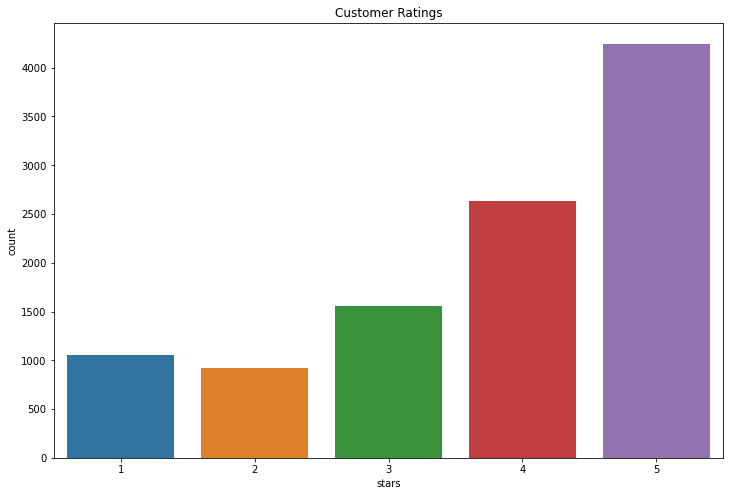

In [3]:
plt.figure(figsize=(12,8))
plt.title("Customer Ratings")
sns.countplot(df.stars);

In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

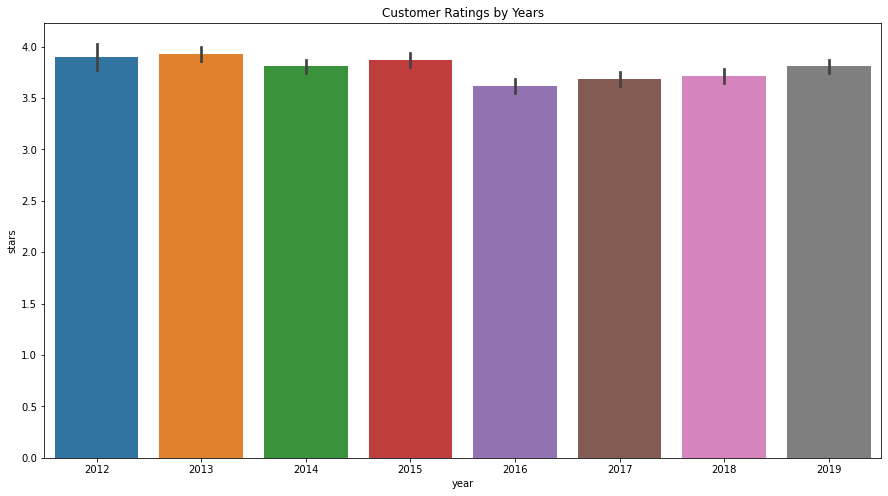

In [5]:
plt.figure(figsize=(15,8))
plt.title("Customer Ratings by Years")
sns.barplot(df.year,df.stars);

In [6]:
df["text"]=df["text"].str.lower()
df["text"]=df["text"].str.replace("[^\w\s]","")
df["text"]=df["text"].str.replace("\d+","")
df["text"]=df["text"].str.replace("\n"," ").replace("\r","")

In [7]:
df.loc[df["stars"] >  3, "sentiment"] = "Positive"
df.loc[df["stars"] == 3, "sentiment"] = "Neutral"
df.loc[df["stars"] <  3, "sentiment"] = "Negative"
df = df[["stars","sentiment","text","year"]]
df.sample(10)

,stars,sentiment,text,year
4520,5,Positive,anyone who rates this place with one or two st...,2013
5339,4,Positive,this place was good but expensive ill probably...,2013
9938,5,Positive,super recomendado todos muy amables desde la e...,2019
5427,4,Positive,food was made fresh i ate a bunch of crab legs...,2018
430,5,Positive,last meal in vegas at caesars and it was so go...,2014
4321,5,Positive,theres a huge selection of food here i like th...,2015
1738,5,Positive,vegas brunches are notoriously amazing and bac...,2018
7498,5,Positive,this is definitely my alltime favorite buffet ...,2015
3788,4,Positive,hands down the best buffet in vegas its pricey...,2017
9839,4,Positive,wow this buffet is huge much bigger than wynn ...,2019


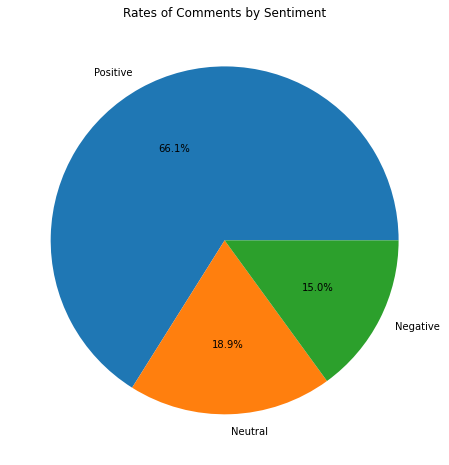

In [8]:
plt.figure(figsize=(10,8))
plt.title("Rates of Comments by Sentiment")
plt.pie(df.sentiment.value_counts(),autopct='%1.1f%%',labels = ["Positive","Neutral","Negative"]);

In [9]:
df["language"]=df["text"].apply(detect)
df=df[df["language"] == "en"]
df

,stars,sentiment,text,year,language
0,5,Positive,after getting food poisoning at the palms hote...,2012,en
1,4,Positive,a feast worthy of gods baccarnal buffet in ca...,2014,en
2,4,Positive,the crab legs are better than the ones at wick...,2015,en
3,1,Negative,not worth it too salty food and expensive this...,2016,en
4,5,Positive,i would give this infinite stars if i could my...,2015,en
...,...,...,...,...,...
10412,5,Positive,best buffet ever irma was great served us bett...,2019,en
10413,4,Positive,hollllllyyyy moleyyyy this buffet was one fo...,2019,en
10414,5,Positive,the selection is amazing and all the food is e...,2019,en
10415,4,Positive,one of the best buffets ive had in vegas my on...,2019,en


In [10]:
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))
df

,stars,sentiment,text,year,language,polarity,subjectivity
0,5,Positive,after getting food poisoning at the palms hote...,2012,en,0.367452,0.605702
1,4,Positive,a feast worthy of gods baccarnal buffet in ca...,2014,en,0.219409,0.537292
2,4,Positive,the crab legs are better than the ones at wick...,2015,en,-0.134722,0.731944
3,1,Negative,not worth it too salty food and expensive this...,2016,en,-0.325000,0.400000
4,5,Positive,i would give this infinite stars if i could my...,2015,en,0.362500,0.725000
...,...,...,...,...,...,...,...
10412,5,Positive,best buffet ever irma was great served us bett...,2019,en,0.543750,0.481250
10413,4,Positive,hollllllyyyy moleyyyy this buffet was one fo...,2019,en,0.210101,0.586869
10414,5,Positive,the selection is amazing and all the food is e...,2019,en,0.480000,0.630000
10415,4,Positive,one of the best buffets ive had in vegas my on...,2019,en,0.185185,0.533333


## Word Cloud

In [11]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords,)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [12]:
text1=df[df["stars"]==3]
text2=df[(df["stars"]==4)|(df["stars"]==5)]
text3=df[(df["stars"]==1)|(df["stars"]==2)] 

create_wordcloud(text1.text)

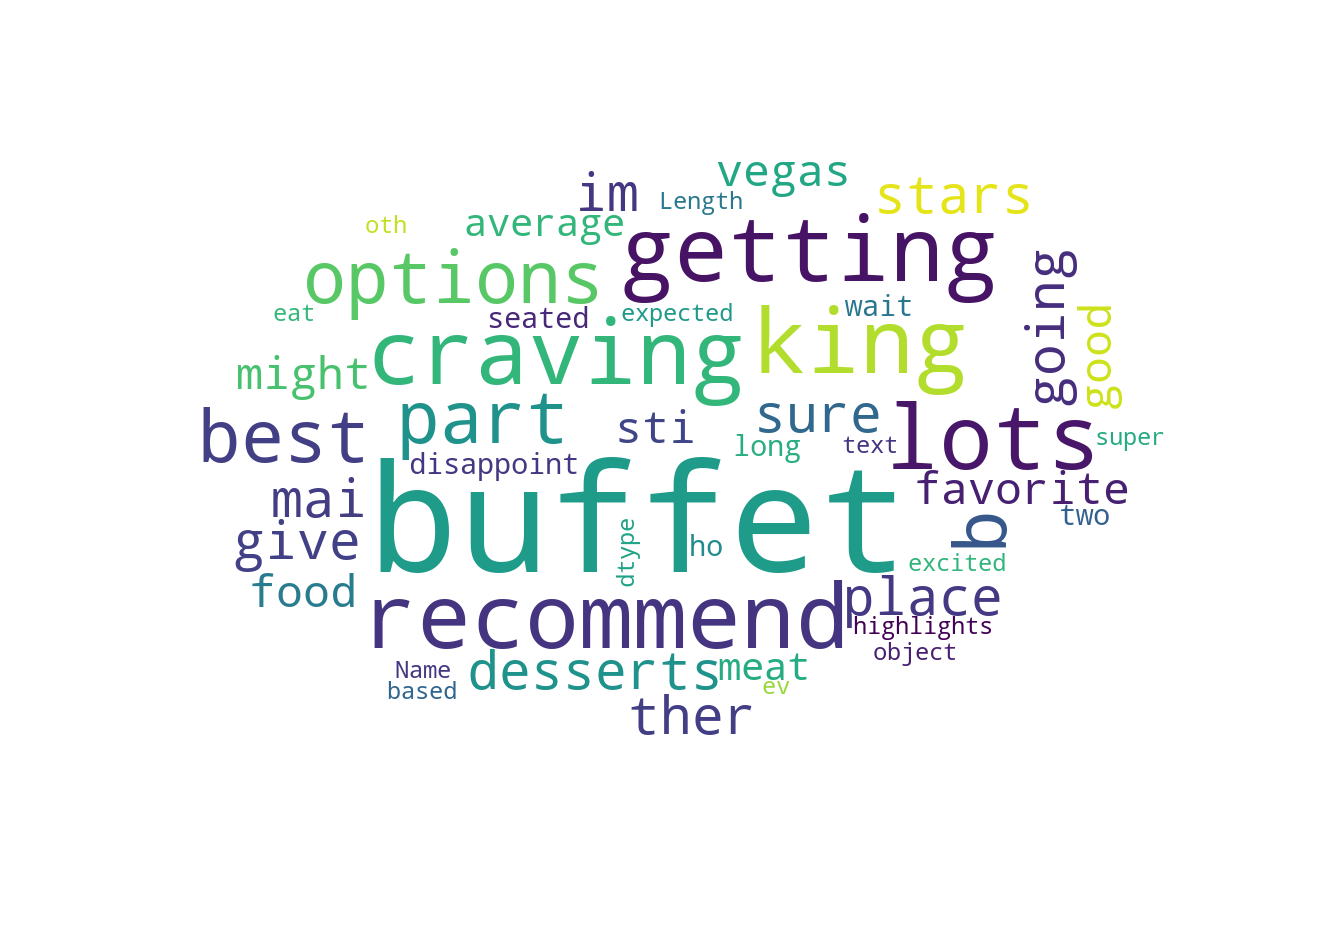

create_wordcloud(text2.text)

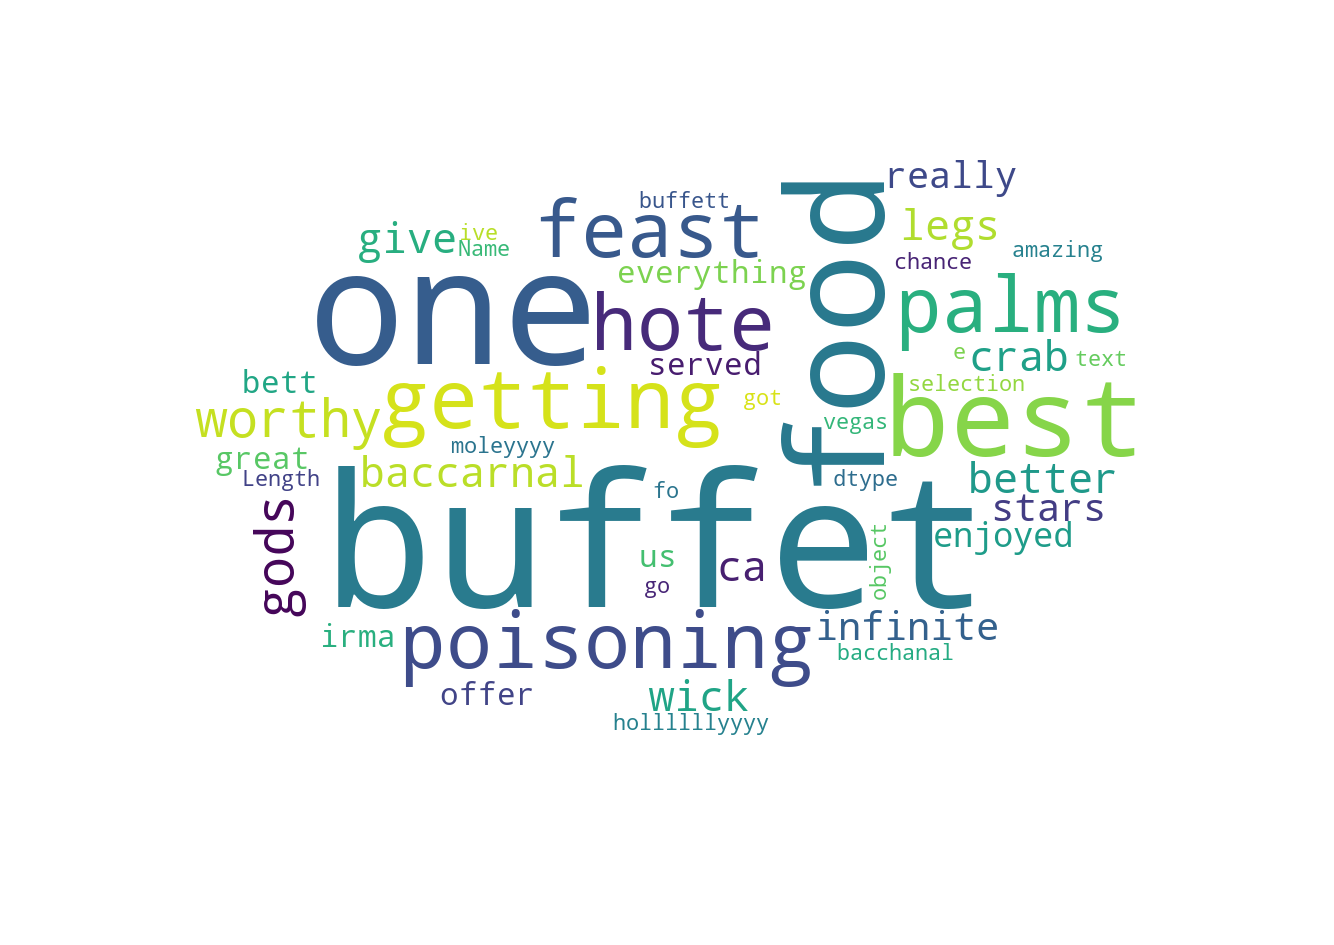

create_wordcloud(text3.text)

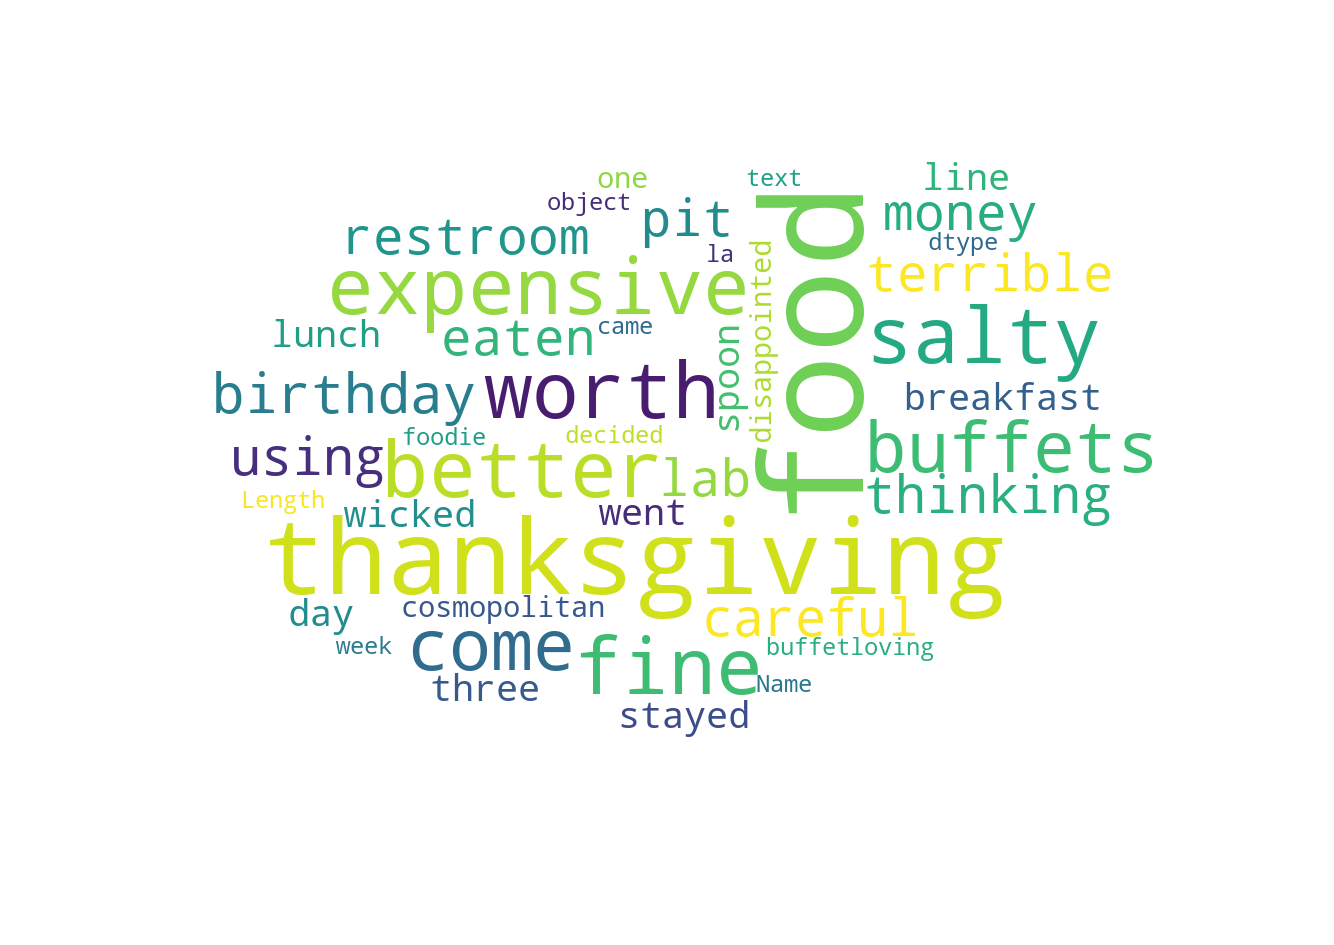

In [13]:
x = df.text
y = df.sentiment

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## Vectorizer

In [15]:
vec = CountVectorizer(stop_words="english")
x_train_vec = vec.fit_transform(x_train)
x_test_vec = vec.transform(x_test)

In [16]:
pd.DataFrame(x_train_vec.toarray(),columns=vec.get_feature_names())

,__,___,____,_________________________,__________________________,____________________________,_really_,_that_,aa,aaa,...,蒙古牛肉,蝦餃,裡面地方很大從自己桌子出發去拿一盤東西再走回來已經佔用了他們所限定時間兩小時裡的相當一部分時間,还要至少拍一个小时队,这家的肉食很不错人多的时候要排队等拿有好多种烤肉和香肠供选择,過了下午六點後才拿出來跟雪蟹混在一起跟其他所有菜一樣拿起來不太容易因為放的太靠內距離太遠,食材不新鲜,食物的選擇蠻多的也不錯不過牡蠣倒是不怎麼樣,饥饿营销明明里面很多空位还告诉我们要排队个半小时到个小时大厅很暗淡黑灯瞎火的食物一般吧就蟹比较新鲜好吃性价比不太高有点失望they,魚香茄子
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [17]:
vec = CountVectorizer(stop_words='english')
x_train_vec = vec.fit_transform(x_train)
x_test_vec = vec.transform(x_test)
x_train_vec.shape

(7261, 18648)

In [18]:
lr=LogisticRegression()
pred_vec=lr.fit(x_train_vec,y_train).predict(x_test_vec)
accuracy=accuracy_score(y_test,pred_vec)
accuracy

0.7809187279151943

In [19]:
precision=precision_score(y_test,pred_vec,average='weighted')
precision

0.7665816183018254

In [20]:
f1=f1_score(y_test,pred_vec,average='weighted')
f1

0.7726077608261318

In [21]:
recall=recall_score(y_test,pred_vec,average='weighted')
recall

0.7809187279151943

In [22]:
confusion_matrix(y_test,pred_vec)

array([[ 388,  114,   92],
       [ 126,  166,  186],
       [  57,  107, 1877]], dtype=int64)

In [23]:
data = {"Method": ["accuracy","precision","f1","recall"],
       "Score": [accuracy,precision,f1,recall]}

In [24]:
df = pd.DataFrame(data=data)
df.sort_values(by=['Score'],ascending = False)

,Method,Score
0,accuracy,0.780919
3,recall,0.780919
2,f1,0.772608
1,precision,0.766582


## N-Gram

In [25]:
apply(detect)vec2=CountVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
x_train_vec2=vec2.fit_transform(x_train)
x_test_vec2=vec2.transform(x_test)

In [26]:
lr=LogisticRegression()
pred_vec2=lr.fit(x_train_vec2,y_train).predict(x_test_vec2)
accuracy=accuracy_score(y_test,pred_vec)
accuracy

0.7809187279151943

In [27]:
precision=precision_score(y_test,pred_vec2,average='micro')
precision

0.8001927401220688

In [28]:
f1=f1_score(y_test,pred_vec2,average='weighted')
f1

0.7843960674641967

In [29]:
recall=recall_score(y_test,pred_vec2,average='weighted')
recall

0.8001927401220688

In [30]:
confusion_matrix(y_test,pred_vec2)

array([[ 400,   88,  106],
       [ 128,  151,  199],
       [  43,   58, 1940]], dtype=int64)

In [31]:
data = {"Method": ["accuracy","precision","f1","recall"],
       "Score": [accuracy,precision,f1,recall]}

In [32]:
df = pd.DataFrame(data=data)
df.sort_values(by=['Score'],ascending = False)

,Method,Score
1,precision,0.800193
3,recall,0.800193
2,f1,0.784396
0,accuracy,0.780919
